#  Analysis of Titanic Disaster Passenger Dataset using Pandas and Machine Learning Libraries


🌊🚢 **Project Description** 🚢🌊

Over a century has passed since the tragic Titanic disaster, yet it continues to captivate researchers eager to unravel the mysteries of survival and loss. Armed with cutting-edge data analysis and the powerful machine learning arsenal of Pandas and Scikit-learn, I embark on a voyage through a Kaggle dataset. This dataset includes 891 training examples, 12 features, and 418 testing examples, each holding a clue to the fates of those onboard. My quest: to discover the life-saving features, and identify the individuals who survived. ⚓✨

🌐 **Dataset Details** 🌐
- 891 Training Examples
- 12 Features
- 418 Testing Examples

🔍 ** Mission** 🔍
To unveil the key factors that determined survival. 🛠️🌟

🌲 **Our Machine Learning Fleet** 🌲
- K-Nearest Neighbors
- Naive Bayes
- Linear Support Vector Machine
- Gaussian Support Vector Machine
- Discriminant Analysis
- Decision Trees
- Random Forests
- Logistic Regression
- XGBoost




**Project Steps:**

1. **Data Preprocessing:**
   - Handle missing values ✨
   - Remove duplicates 🗑️
   - Visualization 📊
   - Encoding the Output Data 📊
   - Checking if the dataset contains any NULL values 🧐
   - Taking care of outliers 📊🧐
   - Feature Engineering
   - Dropping Irrelevant Data Inputs
   - Feature Scaling 📏

2. **Exploratory Data Analysis (EDA):**
   - Reviewing the data for some general information
   - Reviewing overall statistical Information
   - Gaining insights by plotting different variables
   - Checking the correlations 📊📉


3. **Model Training:**
   - Split data into training and testing sets 🧩
   - Train selected models on training data 🚀
   - Models:
     - K-NN Model
     - Naive Bayes
     - SVM-linear
     - SVM-nonlinear (Gaussian Kernel)
     - Discriminant analysis model
     - Decision Tree
     - Random forest tree
     - Logistic regression
     - XGBoost Classifier
     - ANN

4. **Model Evaluation:**
   - Evaluate model performance using accuracy metrics 📊
   - Analyze confusion matrix 📉
   - Plotting the ANN Learning Curve 📈
   - Selecting the best trained ML model.

6. **Tuning (if needed):**
   - Hyperparameter tuning for model optimization ⚙️



## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from sklearn.model_selection import GridSearchCV

## Importing the Datasets

In [2]:
#dataset = pd.read_csv('Titanic_Data.csv') [Changed]

dataset = pd.read_csv('train.csv') #[Used train dataset to training and testing ] 
test_dataset = pd.read_csv('test.csv') 


## Showing the Datasets in a Table

In [3]:
pd.DataFrame(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
pd.DataFrame(test_dataset)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## A Quick Review of the Datasets

In [5]:
##train dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#test dataset info
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Encoding Categorical Data

### Encoding Data Inputs

In [7]:
sexes = {'male': 0.0, 'female': 1.0}
dataset['Sex'] = dataset['Sex'].map(sexes)
test_dataset['Sex'] = test_dataset['Sex'].map(sexes)

In [8]:
# Gender column for the train dataset
pd.DataFrame(dataset['Sex'])

,Sex
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,1.0
889,0.0


In [9]:
## Gender column for the test dataset
pd.DataFrame(test_dataset['Sex'])

,Sex
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


In [10]:
ports = {'S': 0.0, 'C': 1.0, 'Q': 2.0}
dataset['Embarked'] = dataset['Embarked'].map(ports)
test_dataset['Embarked'] = test_dataset['Embarked'].map(ports)

In [11]:
# Embarked  column for the train dataset
pd.DataFrame(dataset['Embarked'])

,Embarked
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
886,0.0
887,0.0
888,0.0
889,1.0


In [12]:
# Embarked  column for the test dataset
pd.DataFrame(test_dataset['Embarked'])

,Embarked
0,2.0
1,0.0
2,2.0
3,0.0
4,0.0
...,...
413,0.0
414,1.0
415,0.0
416,0.0


### Encoding Data Outputs (Labels)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Survived'] = le.fit_transform(dataset['Survived']) # Fit label encoder and return encoded labels.
pd.DataFrame(dataset['Survived'])

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Checking the Current Dataset

In [14]:
pd.DataFrame(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1.0,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0.0,26.0,0,0,111369,30.0000,C148,1.0


## Exploratory Data Analysis (EDA)
Checking the main characteristics of the train dataset.

### Reviewing the data for some general information

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 83.7+ KB


### Reviewing overall statistical information

In [16]:
# Pandas describe() is used to view some basic statistical details like 
# percentile, mean, std etc.
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Gaining some insights by plotting differnet variables

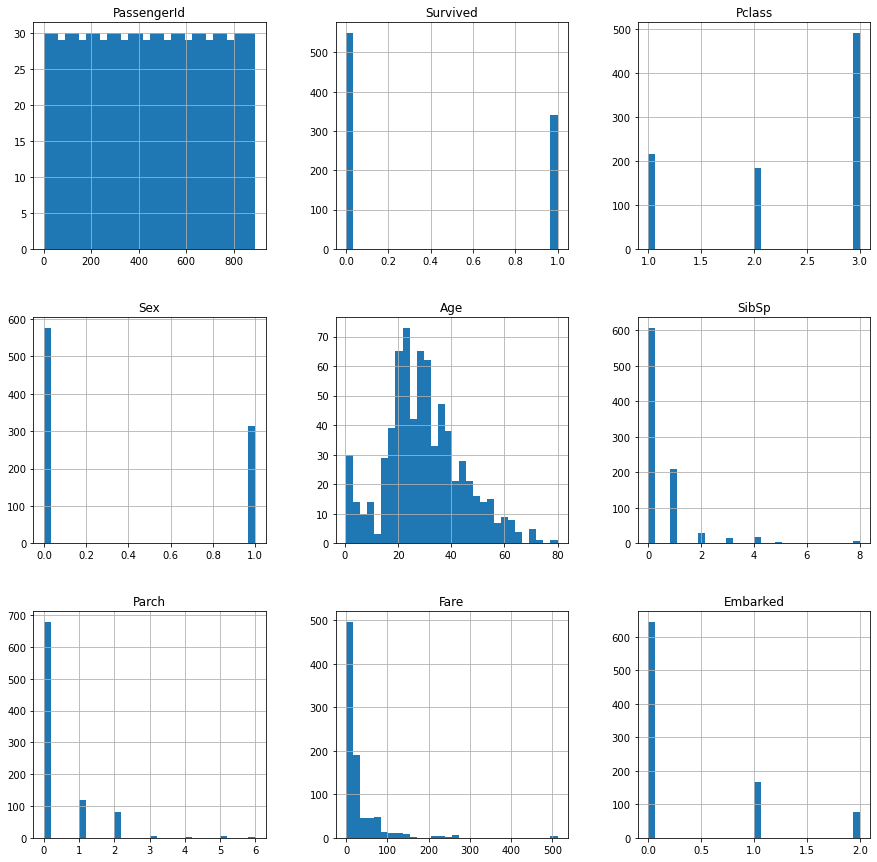

In [17]:
# A histogram is a representation of the frequency distribution of data. 
# The width represents the data interval and the height represents the corresponding frequency. 
# There are no spaces between the bars.

# This function hist() calls matplotlib.pyplot.hist(), on each series in the DataFrame, 
# resulting in one histogram per column.
dataset.hist(bins=30,figsize=(15,15))
plt.show()

In [18]:
# finding the number of males and females on the ship
value_counts_Sex=dataset['Sex'].value_counts()
value_counts_Sex

0.0    577
1.0    314
Name: Sex, dtype: int64

Note: We can see that there were 577 males on the ship ( more males than females).


In [19]:
# Finding the number of passengers who survived
value_counts_Survived=dataset['Survived'].value_counts()
value_counts_Survived

0    549
1    342
Name: Survived, dtype: int64

Note: We can see that there were only 342 passengers who survived in this disaster.

In [20]:
# Getting the data of the passenger who did not survived
dataset[dataset["Survived"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",0.0,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0.0,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0.0,2.0,3,1,349909,21.0750,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0.0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,0.0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1.0,39.0,0,5,382652,29.1250,NaN,2.0
886,887,0,2,"Montvila, Rev. Juozas",0.0,27.0,0,0,211536,13.0000,NaN,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0


In [21]:
dataset['Embarked'].value_counts()

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

Note: Since our mapping for port was ports = {'S': 0.0, 'C': 1.0, 'Q': 2.0} ,

We can conclude from the above result that the number of passengers embarked from each port was as follows:

-Southampton (S): 644

-Cherbourg (C): 168

-Queenstown (Q): 77

We will later replace the two missing values in the "Embarked" feature with the most frequent value
of 0.0 corresponding to Southampton (S). 


### Checking the correlations 

- Here, we want to see how our target value "Survived" correlates to differnt parameters. We can compute the standard correlation coefficint (The Pearsons's r) between target value and other parameters. 

- The correlation coefficient ranges from -1 to +1. When it is close to 1, it means that there is a strong positive correlation (for example, by increasing the parameter the house value goes up); and when it is close to -1, it means that there is a strong negative correlation(for example, by increasing the parameter the house value goes down).<br>
- Please note, correlation coefficient 1 means, comparing a parameter with itself. 

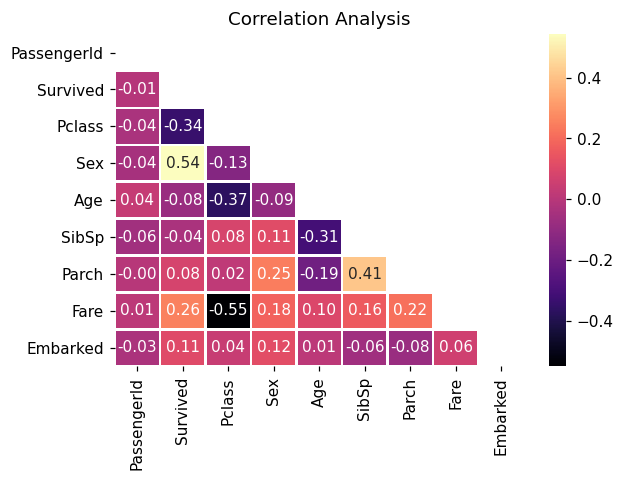

In [22]:
corr_matrix = dataset.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool)) # Only keep the upper triangle of an array.
from seaborn import heatmap
plt.figure(dpi=110)
plt.title('Correlation Analysis')
heatmap(corr_matrix,mask=mask, annot=True,lw=1,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

#### Correlation between the output parameter 'Survived' and input features

In [23]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.108669
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Note: We notice that there is a strong correlation between "Sex" and "Survived". This means that the sex results in higher survival rate. We need to know which sex (i.e male or female) is more likely to 
have higher survival rate than the other sex.

#### Determining which sex will have higher survival rates than the other sex

Determining which sex will have higher survival rates than the other sex:

In [24]:
# Finding the perctange of females and males in the "total number of passengers who did not survive"
# Please remeber that 'female' was encoded as '1.0' and 'male' was encoded as '0.0'

dataset[dataset["Survived"]==0]['Sex'].value_counts()/ len(dataset[dataset["Survived"]==0])

0.0    0.852459
1.0    0.147541
Name: Sex, dtype: float64

In [25]:
# Finding the perctange of females and males in the "total number of passengers who survived"
# Please remeber that 'female' was encoded as '1.0' and 'male' was encoded as '0.0'
dataset[dataset["Survived"]==1]['Sex'].value_counts()/ len(dataset[dataset["Survived"]==1])

1.0    0.681287
0.0    0.318713
Name: Sex, dtype: float64

From the above result, we can see that females tend to have higher survival rates than males.

In [26]:
# Next, Let's find the percetange of survived females in the total number of females 

percentage= sum(dataset[dataset['Sex']==1]['Survived'])/len(dataset[dataset['Sex']==1])

print (" percetange of survived females: {} ".format (percentage))

 percetange of survived females: 0.7420382165605095 


KEY TAKEAWAY: females tend to have higher survival rates than males.

#### Determining survival rates for mutiple age ranges for both sexes 

In [27]:
# First, let's replace the missing values in "Age" column in the train dataset with the mean.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset["Age"].values.reshape(-1,1)) # Fit the imputer on X.
dataset["Age"] = imputer.transform(dataset["Age"].values.reshape(-1,1)) # Impute all missing values in X.

In [28]:
# let's also replace the missing values in "Age" and "Fare" columns in the test dataset with the mean. 
# We will need this later for testing
imputer.fit(test_dataset["Age"].values.reshape(-1,1)) # Fit the imputer on X.
test_dataset["Age"] = imputer.transform(test_dataset["Age"].values.reshape(-1,1)) # Impute all missing values in X.

imputer.fit(test_dataset["Fare"].values.reshape(-1,1)) # Fit the imputer on X.
test_dataset["Fare"] = imputer.transform(test_dataset["Fare"].values.reshape(-1,1)) # Impute all missing values in X.

In [29]:
# train dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 83.7+ KB


In [30]:
# test dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 83.7+ KB


In [31]:
corr_matrix["Age"].sort_values(ascending=False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Embarked       0.012186
Survived      -0.077221
Sex           -0.093254
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [34]:
# 3D Visualization
fig = px.scatter_3d(dataset, x='PassengerId', y='Sex', z='Age', color='Age') 
fig.show()

In [35]:
#Scatter plot 
for template in ["plotly"]:
    fig = px.scatter(dataset, x="PassengerId", y="Age", color="Survived", log_x=True, template=template, title="Which Age Range Survived?")
    fig.show()

Text(0.5, 1.0, 'Survival rate Vesrus Age and Sex ')

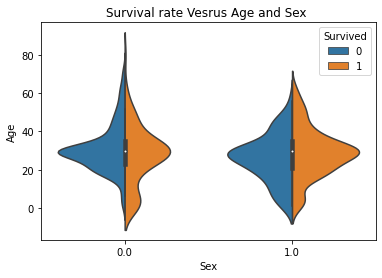

In [36]:
# A violin plot displaying the distribution of the dataset and its probability density for both sexes across
# a wide age range.

sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = dataset, split = True)
plt.title('Survival rate Vesrus Age and Sex ')

The above graph shows a summary of the age range for men, women, and children, who survived. The survival rate is good for children, high for women in the age range 20-40, and   less for men in the same range of 20-40. 

For both sexes, the survival rate decreases as the age passes the age 40 mark.

KEY TAKEAWAY: The younger passengers were the more likely to survive.

#### Correlation between the output parameter 'Pclass' and input fare

In [37]:
corr_matrix["Pclass"].sort_values(ascending=False)

Pclass         1.000000
SibSp          0.083081
Embarked       0.043835
Parch          0.018443
PassengerId   -0.035144
Sex           -0.131900
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64

Note: From the above result, we can notice that there is a strong negative relationship between Pclass and Fare. This was expected as passengers with higher socio-economic status would have paid higher for their fares.

####  Correlation between the output parameter 'Survived' and "Fare"

<AxesSubplot:title={'center':'Survived VS Fare range'}, xlabel='Fare_Range', ylabel='Survived'>

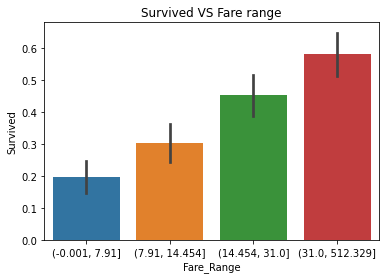

In [38]:
#Creating a new column 'Fare_Range' 
# Dividing Fare into 4 bins
dataset['Fare_Range'] = pd.qcut(dataset['Fare'], 4)
 
# A barplot showing approximate values based on the height of bars.
plt.title('Survived VS Fare range')
sns.barplot(x ='Fare_Range', y ='Survived',
data = dataset)

KEY TAKEAWAY: The above plot shows the dependency of survival rate on the ticket fare. Those passengers who paid higher ticket fares (i.e. those with higher PClass) had higher chances of survival.

### Comparing survival rate with other features

### Survived vs Ticket Class (Pclass) 

In [39]:
dataset[dataset["Survived"]==1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [40]:
dataset[dataset["Survived"]==0]['Pclass'].value_counts()/ len(dataset[dataset["Survived"]==0])

3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64

In [41]:
dataset[dataset["Survived"]==1]['Pclass'].value_counts()/len(dataset[dataset["Survived"]==1])

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

Note: We can notice from the above two results that passengers with higher ticket class (i.e. class 1 is the highest) tend to have higher chances of surival compared with those with lower ticket class.

<AxesSubplot:title={'center':'Survived VS Pclass'}, xlabel='Pclass', ylabel='Survived'>

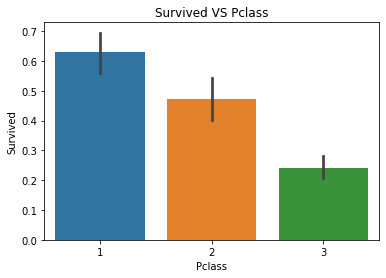

In [42]:
# Bar plot visualization
plt.title('Survived VS Pclass')
sns.barplot(x='Pclass', y='Survived', data=dataset)

KEY TAKEAWAY: Passengers with first class tickets tend to have higher chances of surival compared with those with second or third class tickets.

### Survived vs Port of Embarkation  (Embarked)

In [43]:
# Dealing with missing values in the column "Embarked"
# Replace the two missing values in "Embarked" with the most frequenct value of 0.0 for S.
dataset["Embarked"]=dataset["Embarked"].fillna(0.0)

In [44]:
# dataset info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    float64 
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    float64 
 12  Fare_Range   891 non-null    category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 84.8+ KB


In [45]:
dataset[dataset["Survived"]==0]['Embarked'].value_counts()/ len(dataset[dataset["Survived"]==0])

0.0    0.777778
1.0    0.136612
2.0    0.085610
Name: Embarked, dtype: float64

In [46]:
dataset[dataset["Survived"]==1]['Embarked'].value_counts()/len(dataset[dataset["Survived"]==1])

0.0    0.640351
1.0    0.271930
2.0    0.087719
Name: Embarked, dtype: float64

Note: The above two lines of codes are not enough to find the relationship between survival rate and port of embarkation. Let's use bar plots to find the relationship.

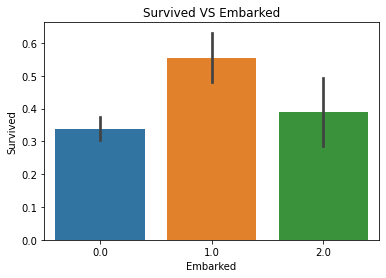

In [47]:
# Bar Plot visualization
sns.barplot(x='Embarked',y= 'Survived', data=dataset,)
plt.title('Survived VS Embarked')
plt.show()

Note : The above graph shows that passengers who boarded in Cherbourg seem to have the highest survival rate. Passengers who boarded in Southhampton were slightly less likely to survive than those who boarded in Queenstown.



So, passengers boarded in port Southampton had the lowest survival rate of 34%, while those from port Cherbourg had the highest survival rate of 55%.

Next, let's find the percentage of passengers who boarded from each port

In [48]:
counts_non_survival =dataset[dataset["Survived"]==0]['Embarked'].value_counts()
counts_non_survival

0.0    427
1.0     75
2.0     47
Name: Embarked, dtype: int64

In [49]:
counts_survival= dataset[dataset["Survived"]==1]['Embarked'].value_counts()
counts_survival

0.0    219
1.0     93
2.0     30
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

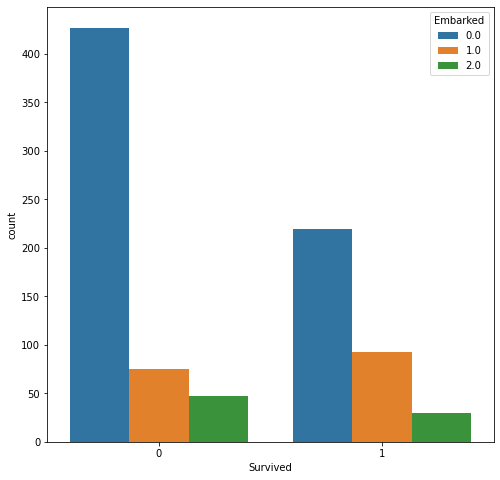

In [50]:
#Visualization for the previous two lines of codes
plt.figure(figsize=(8,8))
sns.countplot( x='Survived', data=dataset, hue="Embarked")

In [51]:
(counts_non_survival +counts_survival)/ len(dataset)

0.0    0.725028
1.0    0.188552
2.0    0.086420
Name: Embarked, dtype: float64

In [52]:
ok=(counts_non_survival +counts_survival)/ len(dataset) *100
ok.value_counts()

8.641975     1
72.502806    1
18.855219    1
Name: Embarked, dtype: int64

Text(0, 0.5, 'Percetange')

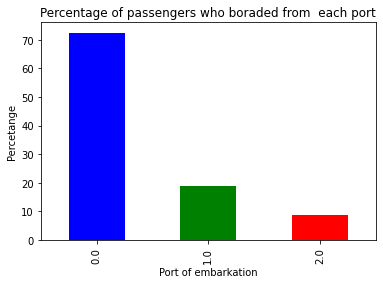

In [53]:
ser=(counts_non_survival +counts_survival)/ len(dataset) *100
ser.plot(kind="bar", color= ['blue', 'green', 'red']);
plt.title('Percentage of passengers who boraded from  each port')
plt.xlabel('Port of embarkation')
plt.ylabel('Percetange')

Note: The percentage of passengers who boraded from Southampton was the highest of 72.5, followed by 18.8% for port Cherbourg and 8.6% for port Queenstown.



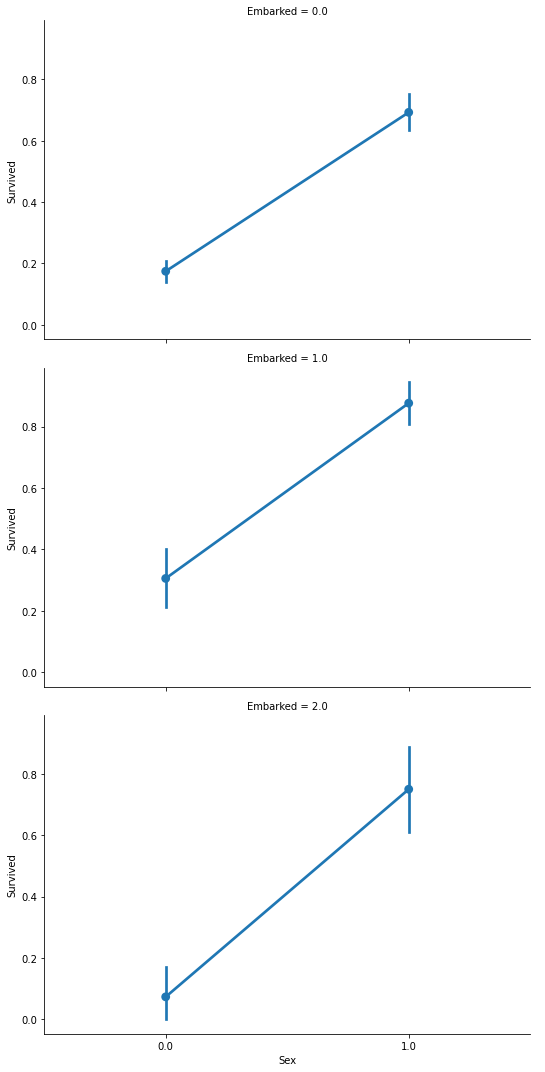

In [54]:
# Comparing  the survival rate with three variable(i.e. 'Embarked','Sex','Pclass'), at the same time 
FacetGrid = sns.FacetGrid(dataset, row='Embarked', height=5, aspect=1.5)
FacetGrid.map(sns.pointplot, 'Sex', 'Survived', order=None, hue_order=None )
FacetGrid.add_legend()

Note: Males and females were more liekly to survive from the port Cherbourg.

Note:
Recall our mapping ports :

    -Southampton (S)  ------->  0.0

    -Cherbourg (C)    ------->  1.0

    -Queenstown (Q)   ------->  2.0



KEY TAKEAWAY: 

Passengers who boarded in Cherbourg had the highest survival rate. Passengers who boarded in Southhampton were slightly less likely to survive than those who boarded in Queenstown.

The percentage of passengers who boraded from Southampton was the highest of 72.5%, followed by 18.8% for port Cherbourg and 8.6% for port Queenstown.


Males and females were more liekly to survive from the port Cherbourg.


### Survived vs Family size


/Users/mmz_10/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/mmz_10/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



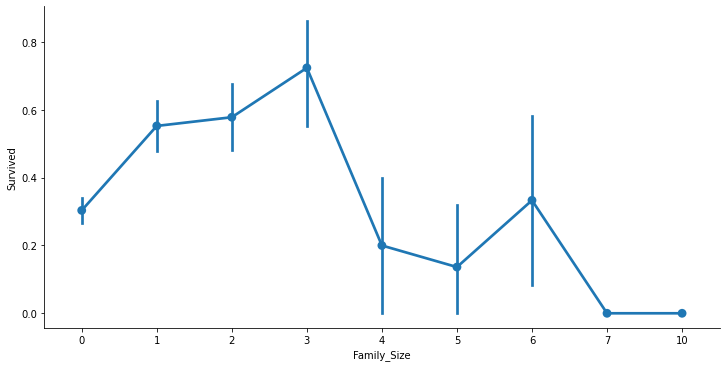

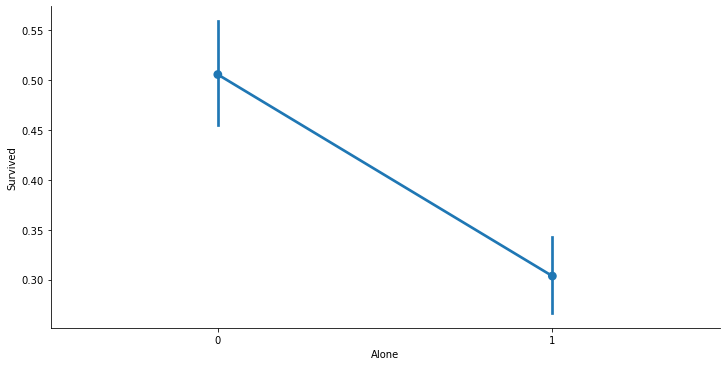

In [55]:
#[Added]
# Adding a column Family_Size by adding "Parch" and "SibSp" columns.
dataset['Family_Size'] = 0
dataset['Family_Size'] = dataset['Parch']+dataset['SibSp']

# these two lines will be needed later for testing
test_dataset['Family_Size'] = 0
test_dataset['Family_Size'] = test_dataset['Parch']+test_dataset['SibSp']
 
# Adding a column Alone
dataset['Alone'] = 0
dataset.loc[dataset.Family_Size == 0, 'Alone'] = 1

# these two lines will be needed later for testing
test_dataset['Alone'] = 0
test_dataset.loc[test_dataset.Family_Size == 0, 'Alone'] = 1

 
# Factorplot for Family_Size

sns.factorplot(x ='Family_Size', y ='Survived', data = dataset,aspect = 2)
 
# Factorplot for Alone

sns.factorplot(x ='Alone', y ='Survived', data = dataset,aspect = 2)

KEY TAKEAWAY : If a passenger is alone, the survival rate is  far less.

If the family size is greater than 3, chances of survival decrease considerably.


## Additonal Feature Engineering

In [56]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

def create_extra_features(data):
    
    data['Has_Cabin'] = data["Cabin"].map(lambda x: 1 - int(type(x) == float))
    #data['Age_Range'] = pd.cut(data['Age'], 4).astype(str)
    
    data['Title'] = data['Name'].apply(get_title).replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    return data


dataset = create_extra_features(dataset)
test_dataset = create_extra_features(test_dataset)





In [57]:
# moving "Survived" column to the end
col_Survived_copy = dataset['Survived'].copy()
dataset=dataset.drop(['Survived'], axis = 1)
dataset['Survived']=col_Survived_copy

In [58]:
#train dataset
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range,Family_Size,Alone,Has_Cabin,Title,Survived
0,1,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,"(-0.001, 7.91]",1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,PC 17599,71.2833,C85,1.0,"(31.0, 512.329]",1,0,1,3,1
2,3,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,"(7.91, 14.454]",0,1,0,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,113803,53.1000,C123,0.0,"(31.0, 512.329]",1,0,1,3,1
4,5,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,373450,8.0500,NaN,0.0,"(7.91, 14.454]",0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0.0,27.000000,0,0,211536,13.0000,NaN,0.0,"(7.91, 14.454]",0,1,0,5,0
887,888,1,"Graham, Miss. Margaret Edith",1.0,19.000000,0,0,112053,30.0000,B42,0.0,"(14.454, 31.0]",0,1,1,2,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,"(14.454, 31.0]",3,0,0,2,0
889,890,1,"Behr, Mr. Karl Howell",0.0,26.000000,0,0,111369,30.0000,C148,1.0,"(14.454, 31.0]",0,1,1,1,1


In [59]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    float64 
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     891 non-null    float64 
 11  Fare_Range   891 non-null    category
 12  Family_Size  891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Has_Cabin    891 non-null    int64   
 15  Title        891 non-null    int64   
 16  Survived     891 non-null    int64   
dtypes: category(1), float64(4), int64(9), object(3)
memory usage: 112.6+ KB


## Dropping Irrelevant Data Inputs

In [60]:
#train dataset
dataset = dataset.drop(['PassengerId'], axis=1)
dataset = dataset.drop(['Name'], axis=1)
dataset = dataset.drop(['Ticket'], axis=1) # [Added]
dataset = dataset.drop(['Cabin'], axis=1)  # [Added]
dataset = dataset.drop(['Fare_Range'], axis=1) 

#test dataset
test_dataset = test_dataset.drop(['PassengerId'], axis=1)
test_dataset = test_dataset.drop(['Name'], axis=1)
test_dataset = test_dataset.drop(['Ticket'], axis=1) 
test_dataset = test_dataset.drop(['Cabin'], axis=1)  

In [61]:
#train dataset
dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Has_Cabin,Title,Survived
0,3,0.0,22.000000,1,0,7.2500,0.0,1,0,0,1,0
1,1,1.0,38.000000,1,0,71.2833,1.0,1,0,1,3,1
2,3,1.0,26.000000,0,0,7.9250,0.0,0,1,0,2,1
3,1,1.0,35.000000,1,0,53.1000,0.0,1,0,1,3,1
4,3,0.0,35.000000,0,0,8.0500,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.0,27.000000,0,0,13.0000,0.0,0,1,0,5,0
887,1,1.0,19.000000,0,0,30.0000,0.0,0,1,1,2,1
888,3,1.0,29.699118,1,2,23.4500,0.0,3,0,0,2,0
889,1,0.0,26.000000,0,0,30.0000,1.0,0,1,1,1,1


In [62]:
#test dataset
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Has_Cabin,Title
0,3,0.0,34.50000,0,0,7.8292,2.0,0,1,0,1
1,3,1.0,47.00000,1,0,7.0000,0.0,1,0,0,3
2,2,0.0,62.00000,0,0,9.6875,2.0,0,1,0,1
3,3,0.0,27.00000,0,0,8.6625,0.0,0,1,0,1
4,3,1.0,22.00000,1,1,12.2875,0.0,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0.0,30.27259,0,0,8.0500,0.0,0,1,0,1
414,1,1.0,39.00000,0,0,108.9000,1.0,0,1,1,5
415,3,0.0,38.50000,0,0,7.2500,0.0,0,1,0,1
416,3,0.0,30.27259,0,0,8.0500,0.0,0,1,0,1


## Preprocessing the Data for Machine Learning

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    float64
 7   Family_Size  891 non-null    int64  
 8   Alone        891 non-null    int64  
 9   Has_Cabin    891 non-null    int64  
 10  Title        891 non-null    int64  
 11  Survived     891 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 83.7 KB


### Seperating the input data from the output data

In [64]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Has_Cabin,Title,Survived
0,3,0.0,22.000000,1,0,7.2500,0.0,1,0,0,1,0
1,1,1.0,38.000000,1,0,71.2833,1.0,1,0,1,3,1
2,3,1.0,26.000000,0,0,7.9250,0.0,0,1,0,2,1
3,1,1.0,35.000000,1,0,53.1000,0.0,1,0,1,3,1
4,3,0.0,35.000000,0,0,8.0500,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.0,27.000000,0,0,13.0000,0.0,0,1,0,5,0
887,1,1.0,19.000000,0,0,30.0000,0.0,0,1,1,2,1
888,3,1.0,29.699118,1,2,23.4500,0.0,3,0,0,2,0
889,1,0.0,26.000000,0,0,30.0000,1.0,0,1,1,1,1


In [65]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,1.0,0.0,1.0,3.0
2,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,2.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,3.0
4,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,5.0
887,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,2.0
888,3.0,1.0,29.699118,1.0,2.0,23.4500,0.0,3.0,0.0,0.0,2.0
889,1.0,0.0,26.000000,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,1.0


### Taking care of outlier in the numerical data

In [66]:
# Source 1: https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843
# Source 2: https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2
#Local Outlier Factor (LOF) — Algorithm for outlier identification

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.01)

# yhat has postive and negative values(i.e +1 & -1).Negative values are outliers 
# and positives inliers

yhat = lof.fit_predict(X)


# filter outlier values
mask = (yhat != -1)

print("mask shape: ",mask.shape)

X, y = X[mask, :], y[mask]
print("X shape",X.shape)
print("y shape",y.shape)

pd.DataFrame(X)

mask shape:  (891,)
X shape (882, 11)
y shape (882,)


,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,1.0,0.0,1.0,3.0
2,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,2.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,3.0
4,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
877,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,5.0
878,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,2.0
879,3.0,1.0,29.699118,1.0,2.0,23.4500,0.0,3.0,0.0,0.0,2.0
880,1.0,0.0,26.000000,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,1.0


###  Splitting the dataset into the training set and test Set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,29.699118,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,1.0
1,3.0,0.0,29.699118,8.0,2.0,69.5500,0.0,10.0,0.0,0.0,1.0
2,3.0,0.0,17.000000,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,1.0
3,2.0,0.0,54.000000,0.0,0.0,26.0000,0.0,0.0,1.0,0.0,1.0
4,1.0,1.0,29.699118,1.0,0.0,89.1042,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
700,3.0,0.0,34.500000,0.0,0.0,6.4375,1.0,0.0,1.0,0.0,1.0
701,2.0,0.0,3.000000,1.0,1.0,26.0000,0.0,2.0,0.0,1.0,4.0
702,3.0,0.0,32.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0
703,3.0,0.0,24.000000,2.0,0.0,24.1500,0.0,2.0,0.0,0.0,1.0


### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [70]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,0.824750,-0.725241,0.006361,-0.474105,-0.473260,-0.469568,-0.553506,-0.555149,0.787839,-0.530866,-0.697588
1,0.824750,-0.725241,0.006361,6.811866,2.093263,0.736968,-0.553506,5.686953,-1.269296,-0.530866,-0.697588
2,0.824750,-0.725241,-0.953996,-0.474105,-0.473260,-0.454564,-0.553506,-0.555149,0.787839,-0.530866,-0.697588
3,-0.381575,-0.725241,1.844089,-0.474105,-0.473260,-0.115280,-0.553506,-0.555149,0.787839,-0.530866,-0.697588
4,-1.587901,1.378853,0.006361,0.436641,-0.473260,1.119632,1.026338,0.069062,-1.269296,1.883716,1.261773
...,...,...,...,...,...,...,...,...,...,...,...
700,0.824750,-0.725241,0.369422,-0.474105,-0.473260,-0.498106,1.026338,-0.555149,0.787839,-0.530866,-0.697588
701,-0.381575,-0.725241,-2.012731,0.436641,0.810002,-0.115280,-0.553506,0.693272,-1.269296,1.883716,2.241454
702,0.824750,-0.725241,0.180363,-0.474105,-0.473260,-0.468997,-0.553506,-0.555149,0.787839,-0.530866,-0.697588
703,0.824750,-0.725241,-0.424629,1.347388,-0.473260,-0.151483,-0.553506,0.693272,-1.269296,-0.530866,-0.697588


## ML Models

Trying out different ML models: Discriminant analysis model, KNN, Naive Bayes, SVM-linear, SVM-nonlinear.

In [71]:
classifier_instances=[]

###  K-NN Model

In [72]:
#Aside

# Searching for the best value for n_neighbor using for-loop (Fine-tuning Optional for this assigment)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

lst=[]
for i in range (1,19):
   
    classifier = KNeighborsClassifier(n_neighbors =i , metric = 'manhattan', p = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lst.append(accuracy)
    print(accuracy)

max_value=max(lst)
max_value_index=lst.index(max_value)
print ("max value :",max_value)
print ("index of max value :",max_value_index)


0.8022598870056498
0.807909604519774
0.8418079096045198
0.8418079096045198
0.8192090395480226
0.8248587570621468
0.8192090395480226
0.8248587570621468
0.8248587570621468
0.8192090395480226
0.8248587570621468
0.8135593220338984
0.8192090395480226
0.8135593220338984
0.8192090395480226
0.8135593220338984
0.8022598870056498
0.8192090395480226
max value : 0.8418079096045198
index of max value : 2


#### Training the K-NN Model on the Training set

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =max_value_index+1 , metric = 'manhattan', p = 0)
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

Note: "minkowski" with p=2 is equivalent to the standard Euclidean metric. In ML, we can use differnt distances, the typical one are:

manhattan: p=0

Euclidean: p=2

Chebyshev: p=∞

Minkowski: p= any other numbers

The most common is the Euclidean



#### Predicting the Test set Results

In [74]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [75]:
accuracy_KNN = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_KNN)

0.8418079096045198


#### Making the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("KNN Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[93 13]
 [15 56]]
KNN Model Accuracy is= 84.18079096045197 %


### Naive Bayes

####  Training the Naive Bayes Model on the Training set

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

#### Predicting the Test set Results

In [78]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,1,1,1,1,0,0,1,...,1,0,1,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [79]:
accuracy_GNB = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_GNB)

0.7740112994350282



#### Making the Confusion Matrix


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("GaussianNB Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")




[[79 27]
 [13 58]]
GaussianNB Model Accuracy is= 77.40112994350282 %


### SVM-linear

####  Training the SVM-linear Model on the Training set

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

We may try different Kernels such as:
- Polynomial Kernel
- Gaussian Radial Basis Function (RBF) Kernel
- Linear Kernel,
- sigmoid Kernel,

classifier = SVC(kernel = 'poly',degree=3)

classifier = SVC(kernel = 'linear')

classifier = SVC(kernel = 'sigmoid')

classifier = SVC(kernel = 'rbf')

#### Predicting the Test set Results

In [82]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,1,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [83]:
accuracy_SVML = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_SVML)

0.8305084745762712



#### Making the Confusion Matrix


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("SVM-Linear Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[91 15]
 [15 56]]
SVM-Linear Model Accuracy is= 83.05084745762711 %


### SVM-nonlinear (Gaussian Kernel)

####  Training the SVM-nonlinear Model on the Training set

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

We may try different Kernels such as:

Polynomial Kernel
Gaussian Radial Basis Function (RBF) Kernel
Linear Kernel,
sigmoid Kernel,
classifier = SVC(kernel = 'poly',degree=3)

classifier = SVC(kernel = 'linear')

classifier = SVC(kernel = 'sigmoid')

classifier = SVC(kernel = 'rbf')

#### Predicting the Test set Results

In [86]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [87]:
accuracy_SVMNL = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_SVMNL)

0.847457627118644



#### Making the Confusion Matrix


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[96 10]
 [17 54]]
Your Model Accuracy is= 84.7457627118644 %



#### Hyperparameter tuning (optional)

In [89]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1,2],
                  'C': [1, 10, 50, 100, 200,250, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 5,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)



Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 250, 300],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [90]:
# best estimator
gsSVMC.best_estimator_

SVC(C=10, gamma=0.01, probability=True)

In [91]:
# Best score
gsSVMC.best_score_

0.825531914893617

###  Discriminant analysis model

####  Training the Discriminant analysis Model on the Training set

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

#### Predicting the Test set Results

In [93]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,1,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [94]:
accuracy_DA = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_DA)

0.8418079096045198



#### Making the Confusion Matrix


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[91 15]
 [13 58]]
Your Model Accuracy is= 84.18079096045197 %


#### Hyperparameter Tuning (optional)

In [96]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=4,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy', verbose=1)

In [97]:
gsLDA.best_estimator_

LinearDiscriminantAnalysis()

In [98]:
# Best score
gsLDA.best_score_

0.8045271629778672

### Decision Tree

In [99]:
# Aside

# Searching for the best max_depth hyperparameter using for-loop
from sklearn.tree import DecisionTreeClassifier

lst=[]
for i in range (1,15):
   
    classifier = DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=i) # Play with hyperparameter
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    lst.append(accuracy)
    print(accuracy)

max_value=max(lst)
max_value_index=lst.index(max_value)
print ("max value :",max_value)
print ("index of max value :",max_value_index)
    

0.7909604519774012
0.8361581920903954
0.8418079096045198
0.8418079096045198
0.8587570621468926
0.847457627118644
0.807909604519774
0.8135593220338984
0.8192090395480226
0.8418079096045198
0.8305084745762712
0.8305084745762712
0.807909604519774
0.8022598870056498
max value : 0.8587570621468926
index of max value : 4


####  Training the Decision tree model on the Training set

In [100]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=max_value_index+1) 
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

#### Predicting the Test set Results

In [101]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [102]:
accuracy_DT = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_DT)

0.8587570621468926



#### Making the Confusion Matrix


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[94 12]
 [13 58]]
Your Model Accuracy is= 85.87570621468926 %


### Random forest tree

Random Forest is one of the ensemble techniques that uses multiple decision trees. 

In [104]:
# Aside

# Searching for the best n_estimators hyperparameter using for-loop
from sklearn.ensemble import RandomForestClassifier

lst=[]


for i in range (1,120):

        classifier = RandomForestClassifier(n_estimators = i, max_depth=3,criterion = 'entropy', random_state = 0,n_jobs=-1)
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        accuracy= accuracy_score(y_test, y_pred)
        lst.append(accuracy)
        print(accuracy)

max_value=max(lst)
max_value_index=lst.index(max_value)
print ("max value :",max_value)
print ("index of max value :",max_value_index)
    

0.8418079096045198
0.8418079096045198
0.8305084745762712
0.8248587570621468
0.847457627118644
0.8361581920903954
0.8361581920903954
0.8418079096045198
0.8418079096045198
0.8418079096045198
0.8361581920903954
0.8418079096045198
0.8418079096045198
0.8418079096045198
0.8418079096045198
0.8418079096045198
0.8418079096045198
0.847457627118644
0.8418079096045198
0.8361581920903954
0.8361581920903954
0.8361581920903954
0.847457627118644
0.8531073446327684
0.8531073446327684
0.8531073446327684
0.847457627118644
0.847457627118644
0.847457627118644
0.847457627118644
0.8587570621468926
0.8531073446327684
0.847457627118644
0.847457627118644
0.8531073446327684
0.8531073446327684
0.8531073446327684
0.8587570621468926
0.8587570621468926
0.8531073446327684
0.8587570621468926
0.8531073446327684
0.8531073446327684
0.8531073446327684
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.8587570621468926
0.

####  Training the random forest  tree model on the Training set

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =max_value_index+1,max_depth=3, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
classifier_instances.append(classifier)

#### Predicting the Test set Results

In [106]:
y_pred = classifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [107]:
accuracy_RF = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_RF)

0.8587570621468926



#### Making the Confusion Matrix


In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")


[[95 11]
 [14 57]]
Your Model Accuracy is= 85.87570621468926 %



#### Hyperparameter tuning (Optional)

Based on https://www.kaggle.com/mohitsital/random-forest-hyperparameter-tuning

In [109]:
#RandomTreeClassifier hyperparameter tuning by RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(1,120,1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in range(1,100,1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf':

In [110]:
############################### Training parameter grid by RandomizedSearchCV ###############################

In [111]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16

In [112]:
#Best parameters
rf_random.best_params_

{'n_estimators': 12,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 98,
 'bootstrap': True}

In [113]:
# model accuracy
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)


0.8305084745762712
[[96 10]
 [20 51]]


In [114]:
######################## hyperparameter tuning by GridSearchCV ##################################

In [115]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


              

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [116]:
# best parameter from gridseachCV
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 400}

In [117]:
#Performance of best parameter
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.847457627118644
[[97  9]
 [18 53]]


In [118]:
#best model prediction on test data
sub = best_random.predict(X_test)
sub

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

### Logistic regression 

#### Training the Logistic Regression model on the train dataset


In [119]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression(solver='lbfgs', max_iter=1000)
LogitReg.fit(X_train, y_train)
classifier_instances.append(LogitReg)

#### Training the Logistic Regression model on the train dataset

In [120]:
'''
predict_proba()
The returned estimates for all classes are ordered by the label of classes.

Label 0 : Fail
Label 1: Pass
'''


Probability=LogitReg.predict_proba(X_test)
print("Shape: ",Probability.shape)
print(" Probability estimates: ",Probability)
#print("Chance of Failure is ", 100*Probability[0,1], "%" )

Shape:  (177, 2)
 Probability estimates:  [[0.03326795 0.96673205]
 [0.8919836  0.1080164 ]
 [0.87186702 0.12813298]
 [0.40285832 0.59714168]
 [0.07598608 0.92401392]
 [0.07731077 0.92268923]
 [0.14632156 0.85367844]
 [0.75380113 0.24619887]
 [0.90311186 0.09688814]
 [0.03056512 0.96943488]
 [0.94528875 0.05471125]
 [0.92073269 0.07926731]
 [0.95711898 0.04288102]
 [0.97969394 0.02030606]
 [0.87485207 0.12514793]
 [0.91991378 0.08008622]
 [0.8955683  0.1044317 ]
 [0.87006927 0.12993073]
 [0.91989511 0.08010489]
 [0.93388231 0.06611769]
 [0.88241026 0.11758974]
 [0.27864353 0.72135647]
 [0.08207371 0.91792629]
 [0.91204665 0.08795335]
 [0.83973368 0.16026632]
 [0.51578375 0.48421625]
 [0.91852512 0.08147488]
 [0.31634405 0.68365595]
 [0.09219029 0.90780971]
 [0.89562592 0.10437408]
 [0.82842376 0.17157624]
 [0.04398241 0.95601759]
 [0.04186832 0.95813168]
 [0.05955552 0.94044448]
 [0.23115298 0.76884702]
 [0.29793269 0.70206731]
 [0.03638759 0.96361241]
 [0.91432782 0.08567218]
 [0.6556

#### Predicting the Test set Results

In [121]:
y_pred=LogitReg.predict(X_test)

In [122]:
compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,1,0,0,1,1,1,1,0,0,1,...,1,0,1,1,0,0,1,0,1,1
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,1


In [123]:
print(y_pred.shape)
print(y_test.shape)

(177,)
(177,)


In [124]:
accuracy_LR = np.sum(y_pred==y_test)/len(y_test)
print(accuracy_LR)

0.8418079096045198


#### Calculate the performance using Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Logistic regression model accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[91 15]
 [13 58]]
Logistic regression model accuracy is= 84.18079096045197 %


#### Hyperparameter tuning

In [126]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.00001,0.0001,0.0002,0.0003],
              "max_iter": [100,200,300,1000],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear','newton-cg', 'lbfgs', 'saga'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,y_train)


Fitting 10 folds for each of 1280 candidates, totalling 12800 fits
[LibLinear]

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'max_iter': [100, 200, 300, 1000], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
                         'tol': [1e-05, 0.0001, 0.0002, 0.0003],
                         'verbose': [1]},
             scoring='accuracy', verbose=1)

In [127]:
# Best score
gsLRM.best_score_

0.8173239436619719

### XGBoost Classifier

#### Training the XGBoost model on the train dataset


In [128]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
classifier_instances.append(XGB)

[16:50:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mmz_10/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



#### Predicting the Test set Results

In [129]:
y_pred = XGB.predict(X_test)

#### Calculate the performance using Confusion Matrix

In [130]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("XGBoost model accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[95 11]
 [17 54]]
XGBoost model accuracy is= 84.18079096045197 %


In [131]:
accuracy_XGB=accuracy_score(y_test, y_pred)
accuracy_XGB

0.8418079096045198

#### Hyperparamter tuning 

In [132]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
}

XGB_model= XGBClassifier()

gsearch = GridSearchCV(estimator = XGB_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

gsearch.fit(X_train,y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/mmz_10/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [133]:
#Best parameters
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [134]:
# best score
gsearch.best_score_

0.8340425531914895

## Selecting the best trained ML model

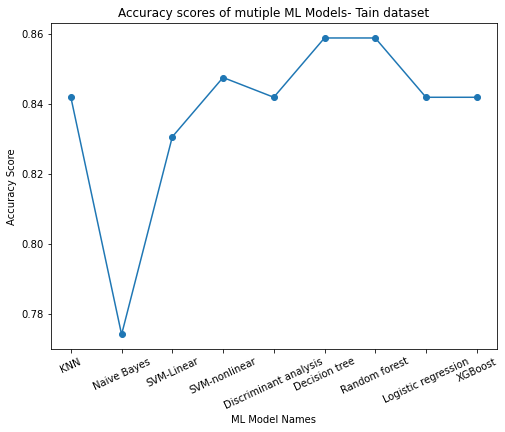

In [135]:
# Plotting the accuracy scores on the train dataset for the 9 ML models
plt.figure(figsize=(8,6))
plt.plot(range(1,10),[accuracy_KNN,accuracy_GNB,accuracy_SVML,accuracy_SVMNL,accuracy_DA,accuracy_DT,accuracy_RF,accuracy_LR,accuracy_XGB],marker='o')
plt.xticks(range(1,10),['KNN','Naive Bayes','SVM-Linear','SVM-nonlinear','Discriminant analysis','Decision tree','Random forest', 'Logistic regression','XGBoost'],rotation=25)
plt.title('Accuracy scores of mutiple ML Models- Tain dataset')
plt.xlabel('ML Model Names')
plt.ylabel("Accuracy Score")
plt.show()

In [136]:
accuracy_RF

0.8587570621468926

In [137]:
accuracy_DT

0.8587570621468926

In [138]:
accuracy_SVMNL

0.847457627118644

In [139]:
accuracy_KNN

0.8418079096045198

In [140]:
accuracy_DA

0.8418079096045198

In [141]:
accuracy_LR

0.8418079096045198

In [142]:
accuracy_XGB

0.8418079096045198

The process that we followed to select the best ML Model for the Titanic disaster classification problem was based on accuracy scores( obtained from confusion matrices) and hyperparameter fine-tuning (i.e. searching for the optimal values of the hyperparameters that have an imapct on some of the classficaiton algorithms used)


Baed on this process,we can find from the above figure that the random forest and decision tree algorithms are ranked in the first place since they all have the highest accuracy score of 0.8587. The Guassian support vector machine algorithm comes in the second place. The third place is  shared equally by the KNN, discrimiant analyiss, logsitc regrssion, and XGBoost algorithms with an accuracy score of 0.8418.

## AutoMl 

In [143]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.000000,1.0,0.0,71.2833,1.0,1.0,0.0,1.0,3.0
2,3.0,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,2.0
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,3.0
4,3.0,0.0,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
877,2.0,0.0,27.000000,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,5.0
878,1.0,1.0,19.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,2.0
879,3.0,1.0,29.699118,1.0,2.0,23.4500,0.0,3.0,0.0,0.0,2.0
880,1.0,0.0,26.000000,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,1.0


In [144]:
from supervised.automl import AutoML


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

automl = AutoML(eval_metric="accuracy",mode="Explain")
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)


AutoML directory: AutoML_1
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.60452 trained in 0.35 seconds
2_DecisionTree accuracy 0.813559 trained in 12.07 seconds
3_Linear accuracy 0.79661 trained in 4.43 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.785311 trained in 2.65 seconds
5_Default_NeuralNetwork accuracy 0.774011 trained in 0.87 seconds
6_Default_RandomForest accuracy 0.813559 trained in 2.73 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.830508 trained in 0.55 seconds
AutoML fit time: 33.95 seconds
AutoML best model: Ensemble


In [145]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,29.699118,0.0,0.0,7.0500,0.0,0.0,1.0,0.0,1.0
1,2.0,0.0,42.000000,1.0,0.0,27.0000,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,27.000000,1.0,0.0,53.1000,0.0,1.0,0.0,1.0,1.0
3,2.0,1.0,45.000000,1.0,1.0,26.2500,0.0,2.0,0.0,0.0,3.0
4,3.0,0.0,29.699118,0.0,0.0,7.7750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
172,3.0,0.0,29.699118,1.0,0.0,24.1500,2.0,1.0,0.0,0.0,1.0
173,1.0,0.0,52.000000,0.0,0.0,30.5000,0.0,0.0,1.0,1.0,5.0
174,3.0,0.0,29.699118,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
175,3.0,1.0,29.699118,0.0,0.0,7.7500,2.0,0.0,1.0,0.0,2.0


## ANN 

In [1366]:
#Tensorflow
import tensorflow as tf

In [1367]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1368]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,19.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,56.000000,0.0,0.0,30.6958,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,39.000000,0.0,0.0,0.0000,0.0,0.0,1.0,1.0,1.0
3,3.0,1.0,9.000000,4.0,2.0,31.2750,0.0,6.0,0.0,0.0,2.0
4,3.0,0.0,29.699118,0.0,0.0,24.1500,2.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
700,3.0,0.0,33.000000,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0
701,2.0,0.0,24.000000,0.0,0.0,10.5000,0.0,0.0,1.0,0.0,1.0
702,3.0,1.0,29.699118,1.0,0.0,16.1000,0.0,1.0,0.0,0.0,3.0
703,3.0,0.0,39.000000,0.0,0.0,24.1500,0.0,0.0,1.0,0.0,1.0


In [1369]:
### Initializing the ANN
model= tf.keras.models.Sequential()

In [1370]:
### Adding the Input Layer
model.add(tf.keras.layers.Dense(units=11,input_dim=11, activation='relu',kernel_initializer='he_normal'))

In [1371]:
### Adding the Hidden Layer
model.add(tf.keras.layers.Dense(units=4, activation='relu',kernel_initializer='he_normal'))
#model.add(tf.keras.layers.Dense(units=2, activation='relu',kernel_initializer='he_normal'))

In [1372]:
### Adding the Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [1373]:
### Compiling the ANN
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1374]:
### Training the ANN
history = \
model.fit(X_train, y_train, \
             validation_split=0.2, batch_size=40, \
             epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 10ms/step - loss: 5.1321 - accuracy: 0.4025 - val_loss: 3.9288 - val_accuracy: 0.4468
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 3.0136 - accuracy: 0.5603 - val_loss: 2.7920 - val_accuracy: 0.6312
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 2.3121 - accuracy: 0.6188 - val_loss: 2.3849 - val_accuracy: 0.6950
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 1.9519 - accuracy: 0.6543 - val_loss: 2.1217 - val_accuracy: 0.6879
Epoch 5/200
15/15 [==============================] - 0s 4ms/step - loss: 1.7178 - accuracy: 0.6844 - val_loss: 1.8994 - val_accuracy: 0.6879
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 1.5133 - accuracy: 0.6809 - val_loss: 1.7110 - val_accuracy: 0.6950
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 1.3653 - accuracy: 0.6684 - val_loss: 1.5512 - val_accuracy: 0.6667
Epoch 8/200


Epoch 59/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7784 - val_loss: 0.4708 - val_accuracy: 0.8156
Epoch 60/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7943 - val_loss: 0.4667 - val_accuracy: 0.8156
Epoch 61/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7943 - val_loss: 0.4662 - val_accuracy: 0.8156
Epoch 62/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8014 - val_loss: 0.4650 - val_accuracy: 0.8156
Epoch 63/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.8050 - val_loss: 0.4585 - val_accuracy: 0.8156
Epoch 64/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7996 - val_loss: 0.4553 - val_accuracy: 0.8156
Epoch 65/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8067 - val_loss: 0.4576 - val_accuracy: 0.7943
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8298 - val_loss: 0.4236 - val_accuracy: 0.8298
Epoch 174/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8262 - val_loss: 0.4231 - val_accuracy: 0.8085
Epoch 175/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8422 - val_loss: 0.4220 - val_accuracy: 0.8227
Epoch 176/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8209 - val_loss: 0.4286 - val_accuracy: 0.8156
Epoch 177/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8333 - val_loss: 0.4235 - val_accuracy: 0.8298
Epoch 178/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8298 - val_loss: 0.4201 - val_accuracy: 0.8227
Epoch 179/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8387 - val_loss: 0.4230 - val_accuracy: 0.8156
Epoch 180/200

In [1378]:
#### Prediction on the Test Set

pd.DataFrame(X_test)



,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,80.000000,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,1.0
1,3.0,0.0,29.699118,1.0,1.0,15.2458,1.0,2.0,0.0,0.0,4.0
2,1.0,0.0,29.000000,1.0,0.0,66.6000,0.0,1.0,0.0,1.0,1.0
3,3.0,0.0,27.000000,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,1.0
4,1.0,1.0,23.000000,1.0,0.0,113.2750,1.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
172,2.0,1.0,4.000000,2.0,1.0,39.0000,0.0,3.0,0.0,1.0,2.0
173,1.0,0.0,18.000000,1.0,0.0,108.9000,1.0,1.0,0.0,1.0,1.0
174,1.0,1.0,58.000000,0.0,0.0,26.5500,0.0,0.0,1.0,1.0,2.0
175,3.0,0.0,22.000000,0.0,0.0,9.0000,0.0,0.0,1.0,0.0,1.0


In [1379]:
y_pred = model.predict(X_test)
Survived = (y_pred > 0.5)
#Just for quick test: 
print('Survived?', Survived[1])
print('Survived?', Survived[0])



Survived? [False]
Survived? [False]


In [1380]:

#### Checking the Confusion Matrix and Accuracy Score

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = (y_pred > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[93 18]
 [15 51]]


0.8135593220338984

In [1381]:
# Another quick way to check the loss and accuracy
model.evaluate(X_test,y_test)




6/6 [==============================] - 0s 843us/step - loss: 0.4480 - accuracy: 0.8136


[0.44801926612854004, 0.8135592937469482]

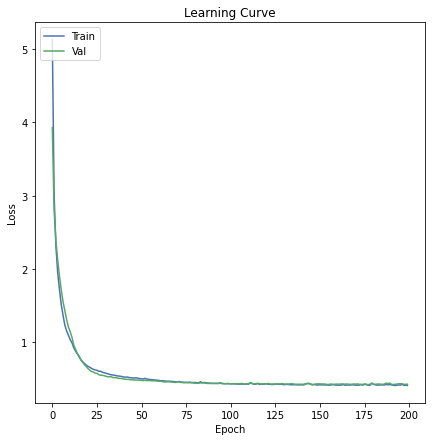

In [1382]:
###  Plotting the Learning Curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper left')

plt.show()


Shows a very good fit !

In [1383]:
# X_test fro the test dataset
X_test = test_dataset.values

# feature scaling for the whole test dataset
X_test = sc.transform(X_test)


In [1384]:
y_pred = model.predict(X_test)
y_pred

array([[0.5052327 ],
       [0.9822492 ],
       [0.37324953],
       [0.31933126],
       [0.92060673],
       [0.45775968],
       [0.97454643],
       [0.47110158],
       [0.9668423 ],
       [0.39210412],
       [0.28381068],
       [0.36884516],
       [0.9932072 ],
       [0.27969894],
       [0.99834406],
       [0.97978085],
       [0.5686612 ],
       [0.5218687 ],
       [0.97268003],
       [0.99117565],
       [0.5590089 ],
       [0.73942095],
       [0.99475855],
       [0.72920656],
       [0.9993795 ],
       [0.27978843],
       [0.9963358 ],
       [0.5096348 ],
       [0.7469308 ],
       [0.3875448 ],
       [0.3908828 ],
       [0.5387348 ],
       [0.95508343],
       [0.9520649 ],
       [0.90277404],
       [0.5421869 ],
       [0.96095955],
       [0.93912256],
       [0.3412255 ],
       [0.25535887],
       [0.38511318],
       [0.83569217],
       [0.21722054],
       [0.9904161 ],
       [0.99848676],
       [0.3435896 ],
       [0.7518834 ],
       [0.500

In [1385]:
y_pred = (y_pred > 0.5)
y_pred=y_pred*1

In [1386]:
#Flatten a 2d numpy array into 1d array
y_pred= y_pred.flatten()

In [1387]:
pd.DataFrame(y_pred)

,0
0,1
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [1388]:
y_pred.shape

(418,)

In [1389]:
# prepare for submission
submission = pd.read_csv('gender_submission.csv')
pd.DataFrame(submission['Survived'])

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [1390]:
type(submission['Survived'])

pandas.core.series.Series

In [1391]:
# accuracy calculation
compare=[y_pred,submission['Survived']]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0,1,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,1
1,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0


In [1392]:
accuracy=np.sum(y_pred==submission['Survived'])/len(submission['Survived'])
print('The accuracy on the test dataset is : {}'.format (accuracy))

The accuracy on the test dataset is : 0.6913875598086124


In [1393]:
cm = confusion_matrix(submission['Survived'], y_pred)
print(cm)
print("The accuracy on the test dataset using confusion matrix is=", accuracy_score(submission['Survived'], y_pred)*100, "%")

[[137 129]
 [  0 152]]
The accuracy on the test dataset using confusion matrix is= 69.13875598086125 %


In [1394]:
# saving our predictions on the test set
submission['Survived'] = y_pred
submission.to_csv('submission.csv', index=False)

## Gender submission

In [164]:
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Has_Cabin,Title
0,3,0.0,34.50000,0,0,7.8292,2.0,0,1,0,1
1,3,1.0,47.00000,1,0,7.0000,0.0,1,0,0,3
2,2,0.0,62.00000,0,0,9.6875,2.0,0,1,0,1
3,3,0.0,27.00000,0,0,8.6625,0.0,0,1,0,1
4,3,1.0,22.00000,1,1,12.2875,0.0,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0.0,30.27259,0,0,8.0500,0.0,0,1,0,1
414,1,1.0,39.00000,0,0,108.9000,1.0,0,1,1,5
415,3,0.0,38.50000,0,0,7.2500,0.0,0,1,0,1
416,3,0.0,30.27259,0,0,8.0500,0.0,0,1,0,1


In [165]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    float64
 7   Family_Size  418 non-null    int64  
 8   Alone        418 non-null    int64  
 9   Has_Cabin    418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 36.0 KB


In [166]:
# X_test fro the test dataset
X_test = test_dataset.values

In [167]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,0.0,34.50000,0.0,0.0,7.8292,2.0,0.0,1.0,0.0,1.0
1,3.0,1.0,47.00000,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,3.0
2,2.0,0.0,62.00000,0.0,0.0,9.6875,2.0,0.0,1.0,0.0,1.0
3,3.0,0.0,27.00000,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3.0,1.0,22.00000,1.0,1.0,12.2875,0.0,2.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1.0,1.0,39.00000,0.0,0.0,108.9000,1.0,0.0,1.0,1.0,5.0
415,3.0,0.0,38.50000,0.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0
416,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0


In [168]:
# feature scaling for the whole test dataset
X_test = sc.transform(X_test)


In [169]:
len(classifier_instances)

9

In [170]:
classifier_instances

[KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=0),
 GaussianNB(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 LinearDiscriminantAnalysis(),
 DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
 RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=31,
                        random_state=0),
 LogisticRegression(max_iter=1000),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)]

###  Computing confusion matrices for all the nine classfiers on the test dataset

In [171]:
# Testing
# predict 
# KNN: 0
# Naive Bayes: 1
# SVM-linear:  2
# SVM-nonlinear: 3
# Discriminant analysis model:4
# Decision tress: 5
# Random forests: 6
# Logistic regression: 7
# XGBoost: 8

accur_scores_test=[]
for i in range (9):
    classifier_instance=classifier_instances[i]
    y_pred = classifier_instance.predict(X_test)
    submission = pd.read_csv('gender_submission.csv')
    cm = confusion_matrix(submission['Survived'], y_pred)
    accur_scores_test.append(accuracy_score(submission['Survived'], y_pred))
    print(cm)
    print("The accuracy on the test dataset using confusion matrix is=", accuracy_score(submission['Survived'], y_pred))

    

[[221  45]
 [ 23 129]]
The accuracy on the test dataset using confusion matrix is= 0.8373205741626795
[[214  52]
 [  9 143]]
The accuracy on the test dataset using confusion matrix is= 0.854066985645933
[[248  18]
 [  4 148]]
The accuracy on the test dataset using confusion matrix is= 0.9473684210526315
[[249  17]
 [ 10 142]]
The accuracy on the test dataset using confusion matrix is= 0.9354066985645934
[[257   9]
 [  4 148]]
The accuracy on the test dataset using confusion matrix is= 0.9688995215311005
[[244  22]
 [  5 147]]
The accuracy on the test dataset using confusion matrix is= 0.9354066985645934
[[252  14]
 [  5 147]]
The accuracy on the test dataset using confusion matrix is= 0.9545454545454546
[[250  16]
 [  6 146]]
The accuracy on the test dataset using confusion matrix is= 0.9473684210526315
[[221  45]
 [ 33 119]]
The accuracy on the test dataset using confusion matrix is= 0.8133971291866029


In [172]:
accur_scores_test

[0.8373205741626795,
 0.854066985645933,
 0.9473684210526315,
 0.9354066985645934,
 0.9688995215311005,
 0.9354066985645934,
 0.9545454545454546,
 0.9473684210526315,
 0.8133971291866029]

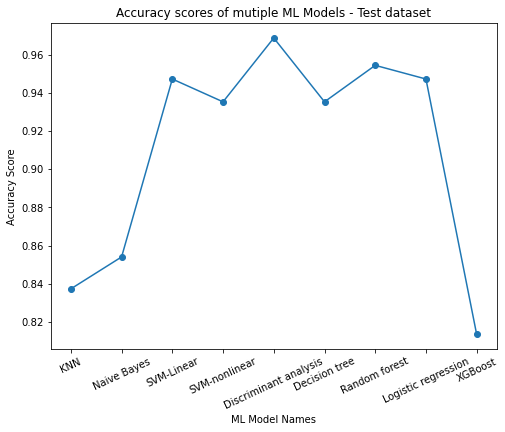

In [173]:

# Plotting the accuracy scores on the test dataset for the 9 ML models
plt.figure(figsize=(8,6))
plt.plot(range(1,10),[accur_scores_test[0],accur_scores_test[1],accur_scores_test[2],accur_scores_test[3],accur_scores_test[4],accur_scores_test[5],accur_scores_test[6],accur_scores_test[7],accur_scores_test[8]],marker='o')
plt.xticks(range(1,10),['KNN','Naive Bayes','SVM-Linear','SVM-nonlinear','Discriminant analysis','Decision tree','Random forest', 'Logistic regression','XGBoost'],rotation=25)
plt.title('Accuracy scores of mutiple ML Models - Test dataset')
plt.xlabel('ML Model Names')
plt.ylabel("Accuracy Score")
plt.show()

Discriminant analysis 96.88%

Random forest  95.45%

Logistic regression and SVM-Linear 94.73%

Decision trees and Naive Bayes 93.54%

### Computing a confusion matrice for one classfier on the test dataset and then creating a sumbssion file for Kaggle competition (Online score)

In [174]:
# predict 
# KNN: 0
# Naive Bayes: 1
# SVM-linear:  2
# SVM-nonlinear: 3
# Discriminant analysis model:4
# Decision tress: 5
# Random forests: 6
# Logistic regression: 7
# XGBoost: 8
classifier_instance=classifier_instances[4]
classifier_instance

LinearDiscriminantAnalysis()

In [175]:
y_pred = classifier_instance.predict(X_test)
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [176]:
# prepare for submission
submission = pd.read_csv('gender_submission.csv')
pd.DataFrame(submission['Survived'])

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [177]:
# accuracy calculation
compare=[y_pred,submission['Survived']]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
0,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
1,0,1,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0


In [178]:
accuracy=np.sum(y_pred==submission['Survived'])/len(submission['Survived'])
print('The accuracy on the test dataset is : {}'.format (accuracy))

The accuracy on the test dataset is : 0.9688995215311005


In [179]:
cm = confusion_matrix(submission['Survived'], y_pred)
print(cm)
print("The accuracy on the test dataset using confusion matrix is=", accuracy_score(submission['Survived'], y_pred)*100, "%")


[[257   9]
 [  4 148]]
The accuracy on the test dataset using confusion matrix is= 96.88995215311004 %


In [180]:
# saving our predictions on the test set
submission['Survived'] = y_pred
submission.to_csv('submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e0e37b7-0069-4f27-bb4a-1a37d80b84f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

  
KNN: 0.75

Naive Bayes: 0.7344
 
SVM-linear: 0.77511 
 
SVM-nonlinear: 0.77272
 
Discriminant analysis model:0.78229

Decision tress: 0.76794
 
Random forests: 0.78708
 
Logistic regression: 0.77990
 
XGBoost:0.75119


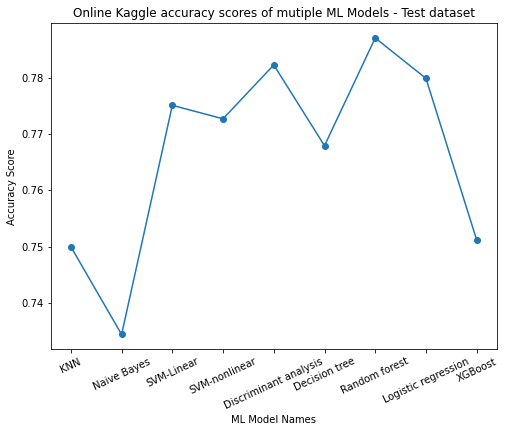

In [163]:
accur_scores_test=[0.75,0.7344, 0.77511,0.77272,0.78229,0.76794,0.78708,0.77990,0.75119]
# Plotting the accuracy scores on the test dataset for the 9 ML models ()
plt.figure(figsize=(8,6))
plt.plot(range(1,10),[accur_scores_test[0],accur_scores_test[1],accur_scores_test[2],accur_scores_test[3],accur_scores_test[4],accur_scores_test[5],accur_scores_test[6],accur_scores_test[7],accur_scores_test[8]],marker='o')
plt.xticks(range(1,10),['KNN','Naive Bayes','SVM-Linear','SVM-nonlinear','Discriminant analysis','Decision tree','Random forest', 'Logistic regression','XGBoost'],rotation=25)
plt.title('Online Kaggle accuracy scores of mutiple ML Models - Test dataset')
plt.xlabel('ML Model Names')
plt.ylabel("Accuracy Score")
plt.show()